Dataset loaded successfully!
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.con

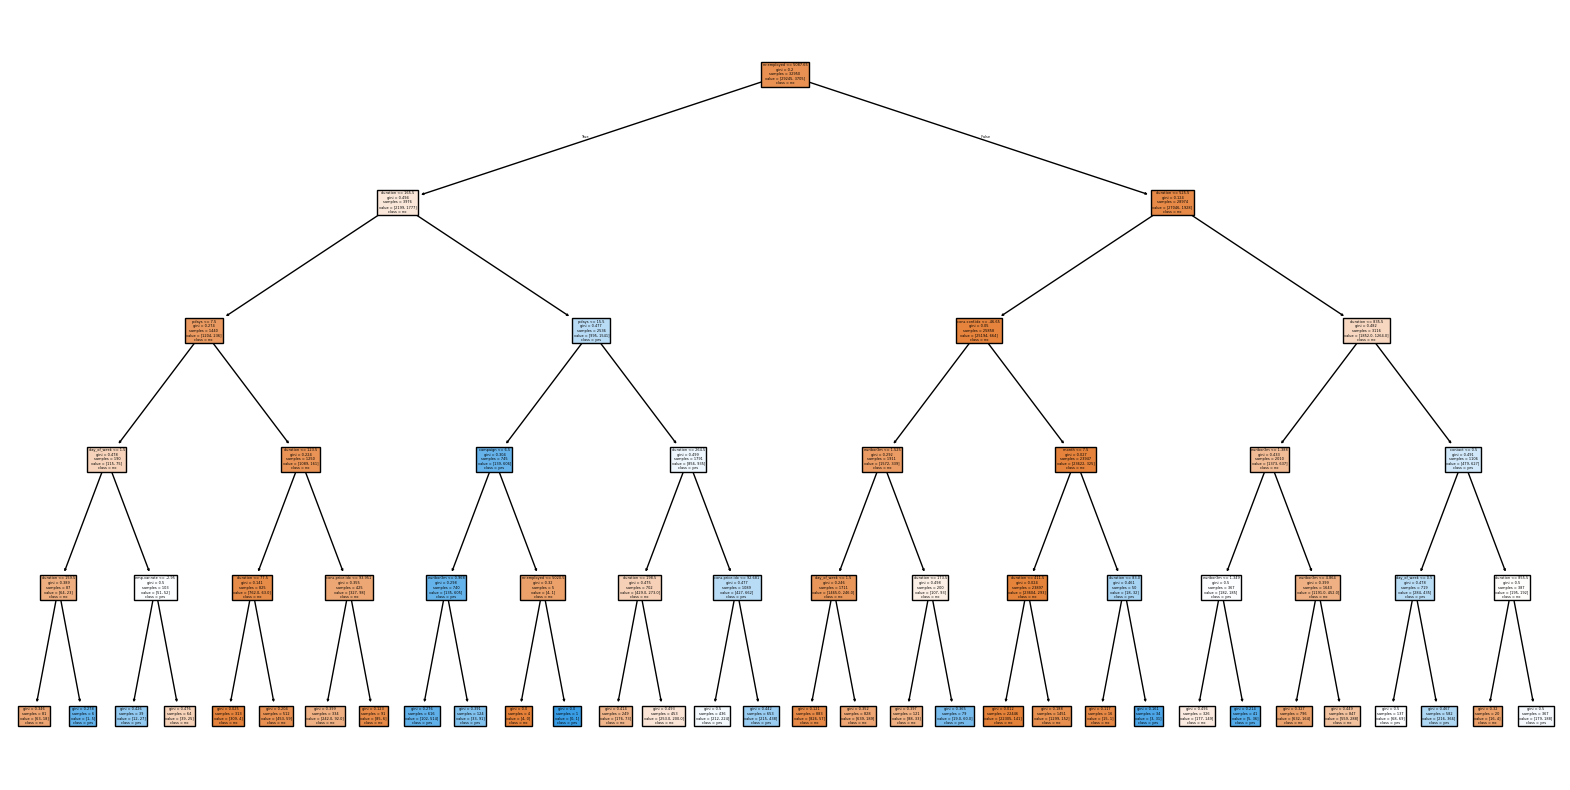

In [ ]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

#Load the dataset
df = pd.read_csv("bank-additional-full.csv", sep=";")

print("Dataset loaded successfully!")
print(df.head())

#Encode all categorical features
encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = encoder.fit_transform(df[col])


#Split features and target

X = df.drop("y", axis=1)  # Features
y = df["y"]               # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Build Decision Tree Model
model = DecisionTreeClassifier(
    max_depth=5,
    criterion="gini",
    random_state=42
)

#Train the model
model.fit(X_train, y_train)


#Make predictions
y_pred = model.predict(X_test)


#Evaluate model performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


#Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=["no", "yes"], filled=True)
plt.show()
